Dataset head:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Features after normalization:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      -0.900681      1.032057      -1.341272     -1.312977
1      -1.143017     -0.124958      -1.341272     -1.312977
2      -1.385353      0.337848      -1.398138     -1.312977
3      -1.506521      0.106445      -1.284407     -1.312977
4      -1.021849      1.263460      -1.341272     -1.312977

Train/test split:
Training samples: 105
Test samples: 45

Accuracy with K=5: 0.9111


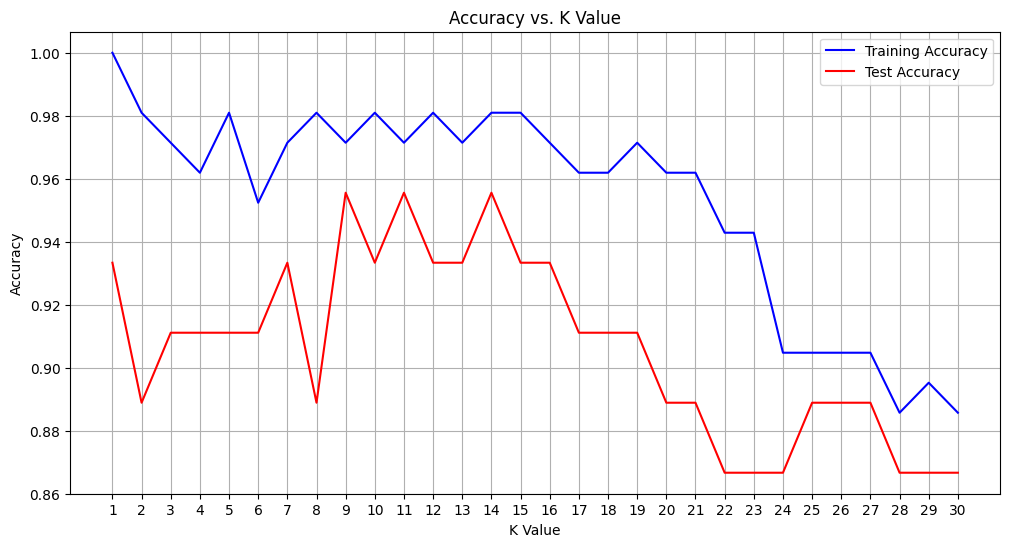

Optimal K: 9 with accuracy: 0.9556


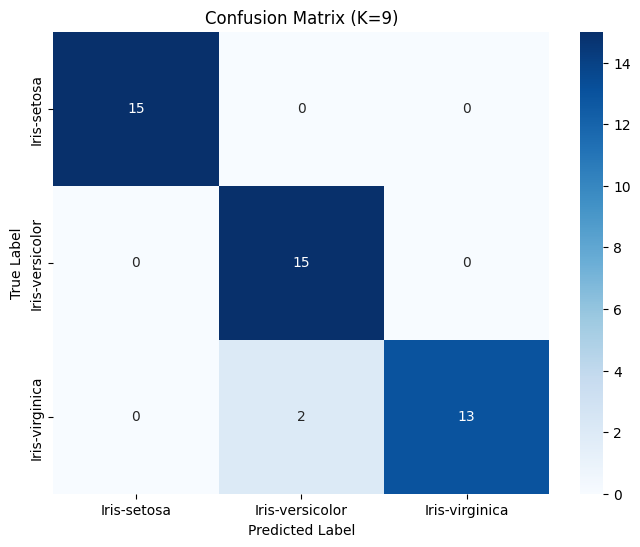


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



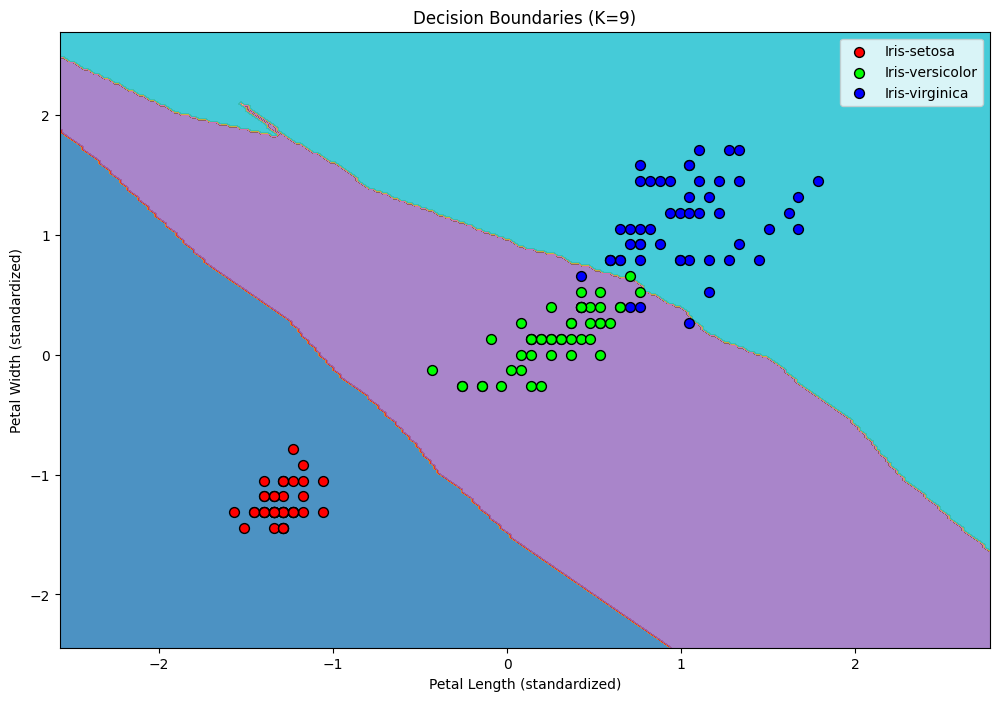

In [3]:
# %% [markdown]
# # K-Nearest Neighbors (KNN) Classification on Iris Dataset

# %% [markdown]
# ## 1. Data Loading and Preprocessing

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("C:/Users/lenov/Downloads/Iris.csv")
print("Dataset head:")
print(df.head())

# Data preprocessing
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\nFeatures after normalization:")
print(X_scaled.head())

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print("\nTrain/test split:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

# %% [markdown]
# ## 2. KNN Classifier Implementation

# %%
# Initialize and train KNN classifier with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy with K=5: {accuracy:.4f}")

# %% [markdown]
# ## 3. Experimenting with Different K Values

# %%
# Test different K values
k_values = range(1, 31)
train_accuracies = []
test_accuracies = []

for k in k_values:
    # Create and train model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Record accuracies
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_accuracies, 'b-', label='Training Accuracy')
plt.plot(k_values, test_accuracies, 'r-', label='Test Accuracy')
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(range(1, 31))
plt.legend()
plt.grid(True)
plt.show()

# Find optimal K
optimal_k = k_values[np.argmax(test_accuracies)]
max_accuracy = max(test_accuracies)
print(f"Optimal K: {optimal_k} with accuracy: {max_accuracy:.4f}")

# %% [markdown]
# ## 4. Model Evaluation

# %%
# Train model with optimal K
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optimal)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=knn_optimal.classes_, 
            yticklabels=knn_optimal.classes_)
plt.title(f'Confusion Matrix (K={optimal_k})')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimal))

# %% [markdown]
## 5. Decision Boundary Visualization (Corrected)

# %%
# Select two features for visualization
feature1 = 'PetalLengthCm'
feature2 = 'PetalWidthCm'

# Create subset with selected features
X_vis = X_scaled[[feature1, feature2]].values

# Map species to numerical labels
species_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y_numeric = y.map(species_map).values

# Train/test split with selected features
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y_numeric, test_size=0.3, random_state=42, stratify=y_numeric
)

# Train KNN on selected features
knn_vis = KNeighborsClassifier(n_neighbors=optimal_k)
knn_vis.fit(X_train_vis, y_train_vis)

# Create mesh grid for decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each mesh point
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create color maps
cmap_light = plt.cm.tab10
cmap_bold = ['#FF0000', '#00FF00', '#0000FF']  # Colors for each class

# Plot decision boundaries
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Plot training points
species_names = list(species_map.keys())
for i, species in enumerate(species_names):
    idx = np.where(y == species)
    plt.scatter(X_vis[idx, 0], X_vis[idx, 1], 
                c=cmap_bold[i], edgecolor='k', 
                s=50, label=species)

plt.title(f'Decision Boundaries (K={optimal_k})')
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.legend()
plt.show()